In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
insurance = pd.read_csv("C:\\csv_dataset\\insurenceDataset\\insurance.csv")

In [6]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
insurance.describe(include='number')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insurance.describe(include= 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
insurance.duplicated().sum()

np.int64(1)

In [14]:
insurance.drop_duplicates(inplace=True)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

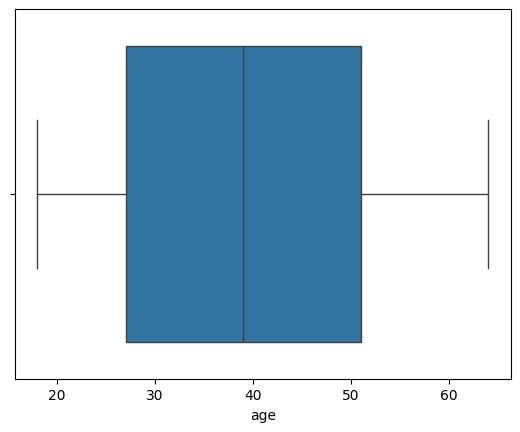

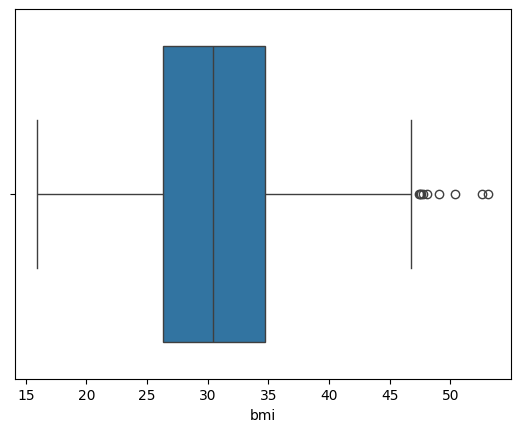

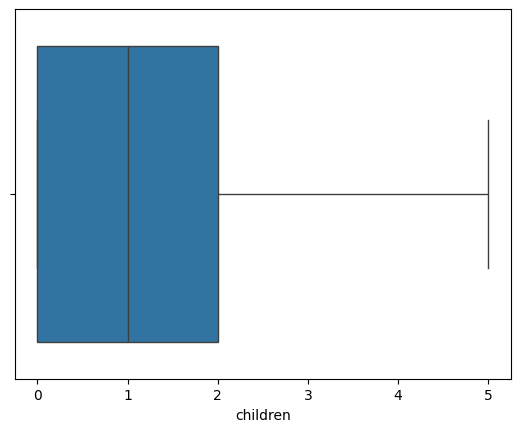

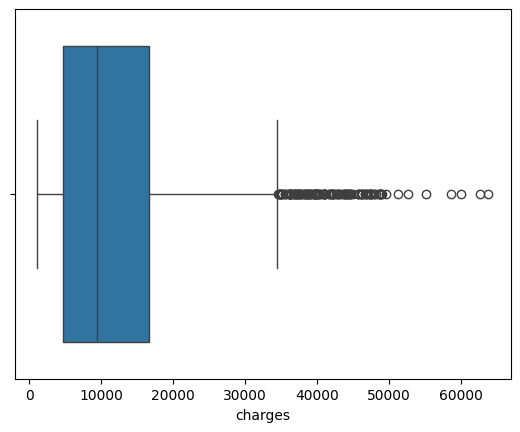

In [19]:
for col in insurance.select_dtypes(include='number').columns:
    sns.boxplot(x = insurance[col])
    plt.show()



In [20]:
def outlierPercentage(insurance, feature):
    q1 = insurance[feature].quantile(0.25)
    q3 = insurance[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    count_upper = insurance[insurance[feature] > upper_bound].shape[0]
    count_lower = insurance[insurance[feature] < lower_bound].shape[0]
    print(f"outlier percentage: {count_upper + count_lower / insurance.shape[0] * 100}")

In [21]:
for colName in insurance.select_dtypes(include='number').columns:
    print(f"{colName}")
    outlierPercentage(insurance, colName)

age
outlier percentage: 0.0
bmi
outlier percentage: 9.0
children
outlier percentage: 0.0
charges
outlier percentage: 139.0


In [22]:
def outlierDrop(insurance, feature):
    q1 = insurance[feature].quantile(0.25)
    q3 = insurance[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return insurance[(insurance[feature] >= lower_bound) & (insurance[feature]<= upper_bound)]


In [23]:
insuranceOutlier = outlierDrop(insurance, 'bmi')
insuranceOutlier.shape

(1328, 7)

In [24]:
insurance.shape

(1337, 7)

<Axes: xlabel='charges', ylabel='Density'>

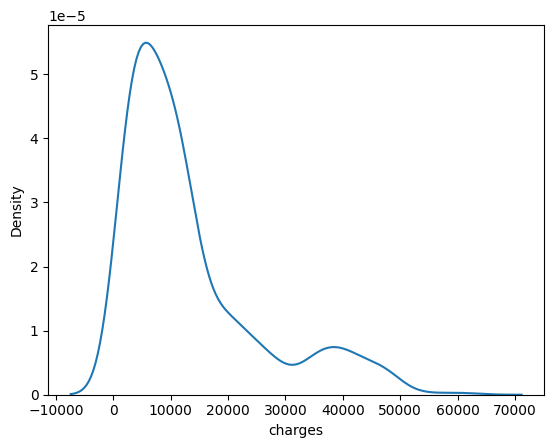

In [25]:
sns.kdeplot(insuranceOutlier['charges'])

In [26]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
x = insuranceOutlier.drop('charges', axis = 1)
y = insuranceOutlier['charges']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .2)

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
ohe.fit(x_train[['sex','smoker','region']])


,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [35]:
temp = ohe.transform(x_train[['sex','smoker','region']])
x_train.drop(['sex','smoker','region'], axis= 1, inplace=True, errors='ignore')
feature_names = ohe.get_feature_names_out()
x_train[feature_names] = temp.toarray()

In [36]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
908,63,39.800,3,1.0,0.0,0.0,0.0,1.0
1087,57,31.540,0,1.0,0.0,1.0,0.0,0.0
1236,63,21.660,0,0.0,0.0,0.0,0.0,0.0
667,40,32.775,2,0.0,1.0,1.0,0.0,0.0
1204,18,27.280,3,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
309,41,33.060,2,0.0,0.0,1.0,0.0,0.0
685,53,26.410,2,1.0,0.0,0.0,0.0,0.0
859,57,28.100,0,1.0,0.0,0.0,0.0,1.0
1292,21,23.210,0,1.0,0.0,0.0,1.0,0.0


In [37]:
temp = ohe.transform(x_test[['sex','smoker','region']])
x_test.drop(['sex','smoker','region'], axis= 1, inplace=True, errors='ignore')
feature_names = ohe.get_feature_names_out()
x_test[feature_names] = temp.toarray()

In [38]:
x_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
385,19,34.400,0,1.0,0.0,0.0,0.0,1.0
1068,63,21.660,1,1.0,0.0,1.0,0.0,0.0
1022,47,36.080,1,1.0,1.0,0.0,1.0,0.0
1138,33,30.250,0,1.0,0.0,0.0,1.0,0.0
347,46,33.345,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
650,49,42.680,2,0.0,0.0,0.0,1.0,0.0
744,50,26.410,0,1.0,0.0,1.0,0.0,0.0
669,40,29.810,1,0.0,0.0,0.0,1.0,0.0
1256,51,36.385,3,0.0,0.0,1.0,0.0,0.0


In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(x_train)
print(f"mse: {mean_squared_error(y_train,y_pred)}")
print(f"mae: {mean_absolute_error(y_train,y_pred)}")

mse: 36470522.68345175
mae: 4189.209054074409


In [42]:
y_pred = lr.predict(x_test)
print(f"mse: {mean_squared_error(y_test,y_pred)}")
print(f"mae: {mean_absolute_error(y_test,y_pred)}")

mse: 34164817.41595397
mae: 4171.516246428132


In [43]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


In [44]:
lr_log = LinearRegression()
lr_log.fit(x_train, y_train_log)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred = lr_log.predict(x_test)
print(f"mse: {mean_squared_error(y_test_log, y_pred)}")
print(f"mae: {mean_absolute_error(y_test_log, y_pred)}")


mse: 0.16702890469946594
mae: 0.2623644307109976
